In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Melis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importing the Louisville dataset, and printing the dataframe to see what columns are needed.  I wanted to make sure all of my columns with dates aligned, so I converted to datetime.  I knew all three datasets included a controlled year of 2022, so filtered out anything that was not dated in the year 2022.

In [3]:
df = pd.read_csv('Animal_IO_Data.csv')
df['indate'] = pd.to_datetime(df['indate'], errors='coerce')
df = df[df['indate'].dt.year == 2022]

I want to import another city's data, to have a closer comparison.  I was seeing an erorr with the data before importing, so I did research and found the "usecols" function to just view the columns needed for the analysis. 

In [4]:
columns_to_include = ['Animal Type', 'Animal Breed', 'Intake Type', 'Intake Subtype', 'Intake Date', 'Outcome Type', 'Outcome Subtype', 'Month', 'Year']
df3 = pd.read_csv('Dallas_Animal_Shelter_Data_Fiscal_Year_2022_-_2023.csv', usecols=columns_to_include)
df3['Intake Date'] = pd.to_datetime(df3['Intake Date'], errors='coerce')
df3 = df3[df3['Intake Date'].dt.year == 2022]

I now want to integrate a third dataset showing the nationwide data. I want to drop some unnecessary columns as well as narrow down to the data from the year 2022. I want to print the column headings to grasp all the data I have.

In [5]:
df2 = pd.read_excel('3 year 21-22-23 SAC Agg.xlsx')
df2.drop(columns=['Organizations'], inplace=True)
for col in df2.columns:
    print(col)
df2.dtypes
df2 = df2[df2['Year'] == 2022]
df2.reset_index(drop=True, inplace=True)
df2 = df2[df2['State'].isin(['KY', 'TX'])]  

State
Year
Intake - Relinquished By Owner Total-Feline
Intake - Stray At Large Total-Feline
Intake - Transferred In Total-Feline
Intake - Owner Intended Euthanasia Total-Feline
Intakes - Other Intakes Total-Feline
Live Outcome - Adoption Total-Feline
Live Outcome - Returned To Owner Total-Feline
Live Outcome - Returned To Field Total-Feline
Live Outcome - Transferred Out Total-Feline
Live outcome - Other Live Outcome Total-Feline
Other Outcome - Died In Care Total-Feline
Other Outcome - Lost In Care Total-Feline
Other Outcome - Owner Intended Euthanasia Total-Feline
Other Outcome - Shelter Euthanasia Total-Feline
Intake - Relinquished By Owner Total-Canine
Intake - Stray At Large Total-Canine
Intake - Transferred In Total-Canine
Intake - Owner Intended Euthanasia Total-Canine
Intakes - Other Intakes Total-Canine
Live Outcome - Adoption Total-Canine
Live Outcome - Returned To Owner Total-Canine
Live Outcome - Returned To Field Total-Canine
Live Outcome - Transferred Out Total-Canine
Liv

In order to ensure my above code worked and it only displays the two states and one year requested, I want to print the dataframe.

Dropping columns that I do not need from the Louisville data.

In [6]:
df.drop(columns=['kennel', 'animalid', 'jurisdiction', 'sex', 'color', 'breed', 'sourcezipcode', 'ObjectId'], inplace=True)
df = df.dropna()

I am going to combine all the intake columns into one, and do the same for the outtake columns.  I used AI to help with this.


In [7]:
intake_columns = [col for col in df2.columns if 'Intake' in col]
df2['Combined_National_Intake'] = df2[intake_columns].sum(axis=1)
outtake_columns = [col for col in df2.columns if 'Outcome' in col]
df2['Combined_National_Outcome'] = df2[outtake_columns].sum(axis=1)

Combining all the columns for Intake and Outcome, I want to show the sums for each.

In [8]:
df2_grouping = df2.groupby('State' , as_index=False)['Combined_National_Intake'].sum()
df2_grouping2 = df2.groupby('State' , as_index=False)['Combined_National_Outcome'].sum()
df2_grouped = pd.merge(df2_grouping, df2_grouping2, on='State')

Concatenating the columns, and adding in Louisville before each of the Louisville dataset column headers and repeating that for the Dallas dataset column headers.

In [9]:
df = df.reset_index(drop=True)
df3 = df3.reset_index(drop=True)
merged_df = pd.concat([df, df3], axis=1)

df.columns = ['Louisville_' + col for col in df.columns]
df3.columns = ['Dallas_' + col for col in df3.columns]

merged_df = pd.concat([df, df3], axis=1)

Merging the two datasets side by side.

In [10]:
merged_df.to_csv('combined_data7.csv', index=False)

Counting each animal type to determine the sum of each type across the city datasets.

In [11]:
louisville_animal_count = merged_df['Louisville_animaltype'].value_counts()
dallas_animal_count = merged_df['Dallas_Animal Type'].value_counts()
print("Louisville Animal Type Counts:")
print(louisville_animal_count)
print("\nDallas Animal Type Counts:")
print(dallas_animal_count)


Louisville Animal Type Counts:
Louisville_animaltype
DOG           4522
CAT           2921
RABBIT         146
OTHER           59
BIRD            24
LIVESTOCK       10
GUINEA PIG       3
Name: count, dtype: int64

Dallas Animal Type Counts:
Dallas_Animal Type
DOG          5586
CAT          1528
WILDLIFE      107
BIRD           35
LIVESTOCK      10
Name: count, dtype: int64


Figuring out the mode for each dataset and presenting that information below.

In [12]:
louisville_mode = merged_df['Louisville_animaltype'].mode()[0]
dallas_mode = merged_df['Dallas_Animal Type'].mode()[0]

print(f"Most common Louisville Animal Type: {louisville_mode}")
print(f"Most common Dallas Animal Type: {dallas_mode}")

Most common Louisville Animal Type: DOG
Most common Dallas Animal Type: DOG


Printing to see the two different counts among the datasets.

In [13]:
print("Louisville Animal Type Counts:")
print(louisville_animal_count)
print("\nDallas Animal Type Counts:")
print(dallas_animal_count)

Louisville Animal Type Counts:
Louisville_animaltype
DOG           4522
CAT           2921
RABBIT         146
OTHER           59
BIRD            24
LIVESTOCK       10
GUINEA PIG       3
Name: count, dtype: int64

Dallas Animal Type Counts:
Dallas_Animal Type
DOG          5586
CAT          1528
WILDLIFE      107
BIRD           35
LIVESTOCK      10
Name: count, dtype: int64


Creating a pie chart to show the differences between the animal types in Louisville and Dallas intakes/outcomes. This one required a lot of research and some AI.

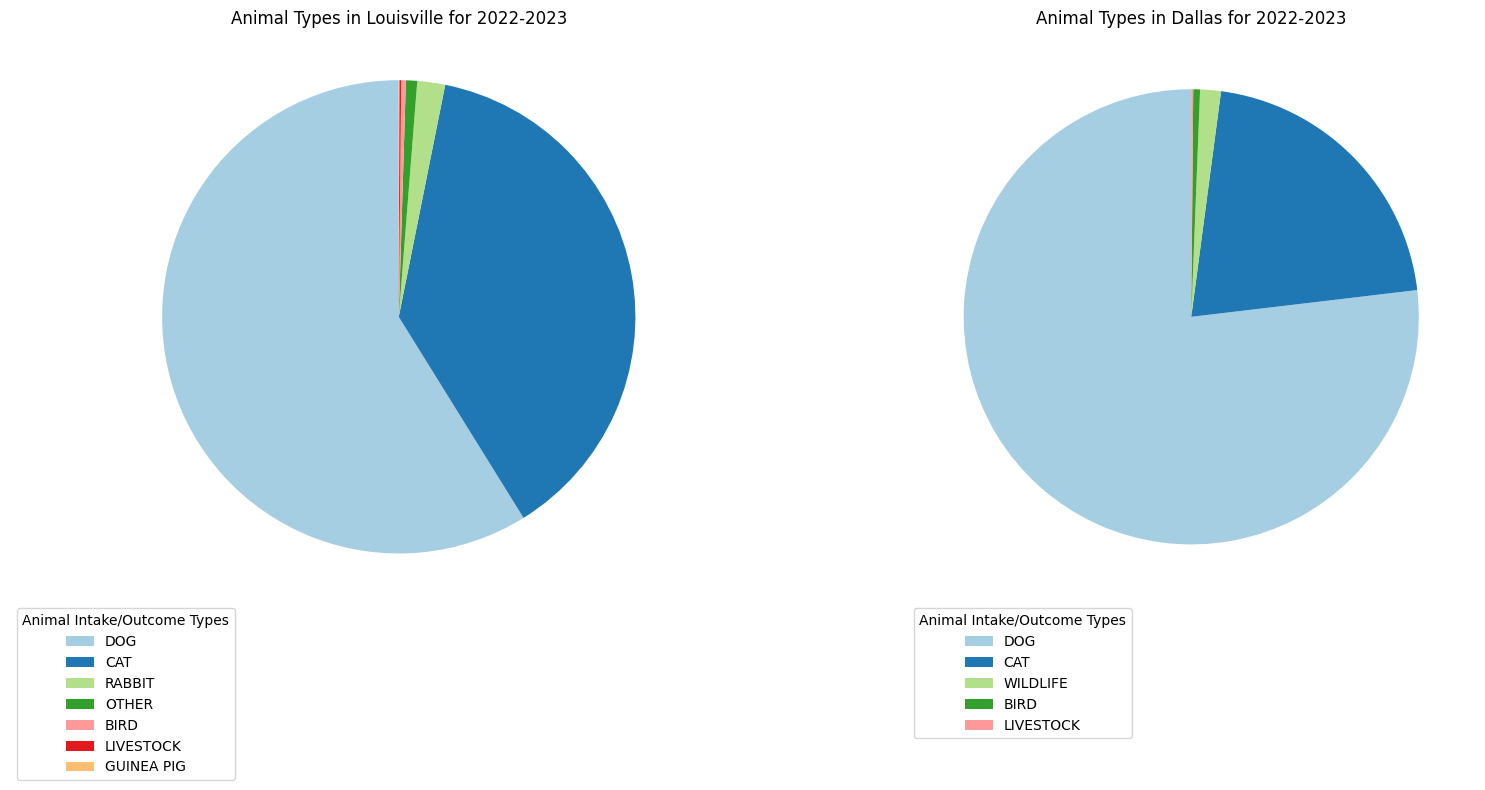

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
patches, texts = ax1.pie(
    louisville_animal_count, 
    autopct= None, 
    startangle=90,
    colors=plt.cm.Paired.colors,
    labels=None
)
ax1.set_title('Animal Types in Louisville for 2022-2023')
ax1.legend(patches, louisville_animal_count.index, title="Animal Intake/Outcome Types", loc="upper left", bbox_to_anchor=(0,0))
ax1.axis('equal') 
patches2, texts2 = ax2.pie(
    dallas_animal_count, 
    autopct= None, 
    startangle=90,
    colors=plt.cm.Paired.colors, 
    labels=None
)
ax2.set_title('Animal Types in Dallas for 2022-2023')
ax2.legend(patches, dallas_animal_count.index, title="Animal Intake/Outcome Types", loc="upper left", bbox_to_anchor=(0,0))
ax1.axis('equal')
plt.tight_layout()
plt.show()

This is to layout the outcome counts, so that I can work on the percentage next.

In [15]:
louisville_outcome_count = merged_df['Louisville_outtype'].value_counts()
dallas_outcome_count = merged_df['Dallas_Outcome Type'].value_counts()

Calculating the percentages of outcomes to the total number of outcomes to see what outcomes are more frequent between the two cities.

In [16]:
louisville_total = louisville_outcome_count.sum()
dallas_total = dallas_outcome_count.sum()
louisville_percentage = (louisville_outcome_count / louisville_total) * 100
dallas_percentage = (dallas_outcome_count / dallas_total) * 100

Now, I want to show this as a visual. This code below took a lot of research and tweaking.

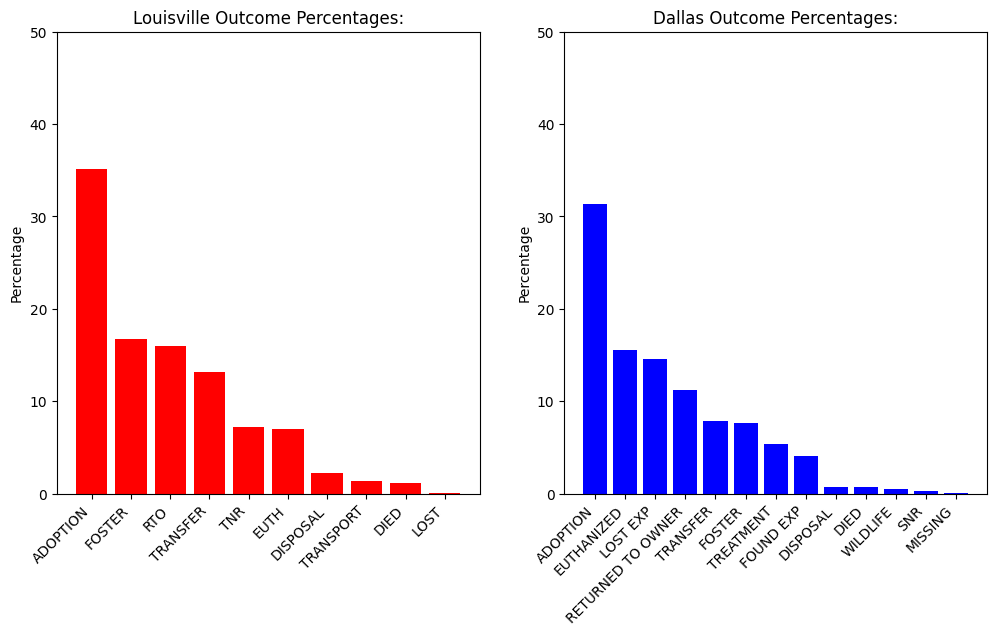

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].bar(louisville_percentage.index, louisville_percentage, color='red')
axes[0].set_title("Louisville Outcome Percentages:")
axes[0].set_xticks(range(len(louisville_percentage.index)))  
axes[0].set_xticklabels(louisville_percentage.index, rotation=45, ha='right')
axes[0].set_ylim(0, 50)
axes[0].set_ylabel("Percentage")
axes[0].tick_params(axis='y', which='both', labelleft=True)
axes[1].bar(dallas_percentage.index, dallas_percentage, color='blue')
axes[1].set_title("Dallas Outcome Percentages:")
axes[1].set_xticks(range(len(dallas_percentage.index)))  
axes[1].set_xticklabels(dallas_percentage.index, rotation=45, ha='right')
axes[1].set_ylim(0, 50)
axes[1].set_ylabel("Percentage")
axes[1].tick_params(axis='y', which='both', labelleft=True)

plt.tight_layout
plt.show()


Now I want to create a visual that shows the amount of each set of data and their outcomes.  This is where I want to include the nationwide numbers just to compare

In [18]:
count = merged_df['Louisville_intype'].count()
print("Total of Louisville intakes in 2022:  ", count)

merged_df['Dallas_Intake Date'] = pd.to_datetime(merged_df['Dallas_Intake Date'], errors='coerce')
count2 = merged_df['Dallas_Intake Type'].count()
print("Total of Dallas intakes in 2022:  ", count2)

print(df2_grouped)

Total of Louisville intakes in 2022:   7685
Total of Dallas intakes in 2022:   7266
  State  Combined_National_Intake  Combined_National_Outcome
0    KY                     34792                      33060
1    TX                    209938                     206459


Now I want to compare the amount of intakes to each state (Louisville to KY, Dallas to TX)

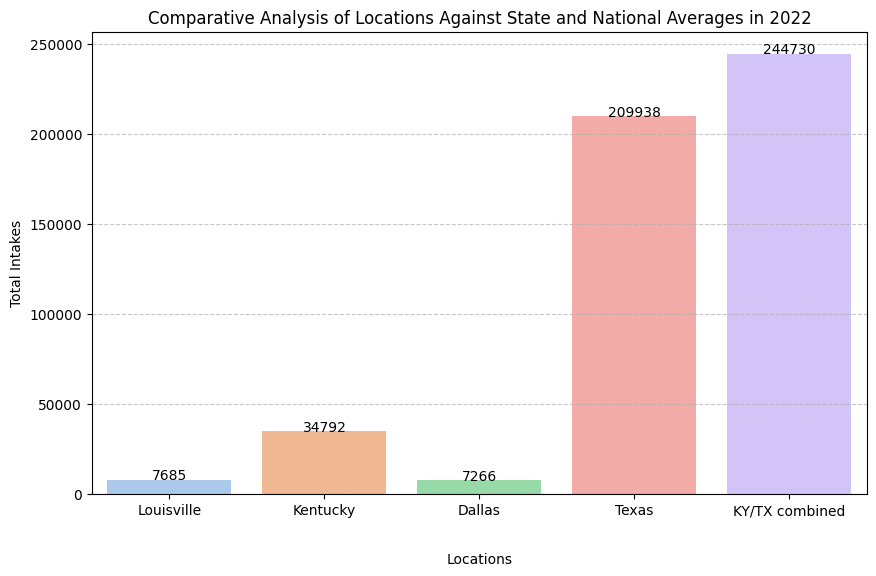

In [19]:
state_intakes = df2_grouped.set_index('State')['Combined_National_Intake']

louisville_intake = merged_df['Louisville_intype'].count()
dallas_intake = merged_df['Dallas_Intake Type'].count()
ky_intake = state_intakes.get('KY', 0)
tx_intake = state_intakes.get('TX', 0)

national_intake = df2_grouped['Combined_National_Intake'].sum()

labels = ['Louisville', 'Kentucky', 'Dallas', 'Texas', 'KY/TX combined']
values = [louisville_intake, ky_intake, dallas_intake, tx_intake, national_intake]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, hue=labels, palette='pastel', legend=False)

plt.title("Comparative Analysis of Locations Against State and National Averages in 2022")
plt.xlabel("Locations", labelpad=25)
plt.ylabel("Total Intakes")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(values):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10)

plt.show()


In conclusion, Louisville and Dallas are similar in their intake/outcome numbers in a given year, as well as the most of one certain animal type. The Dallas dataset indicated that a higher percentage of animals are euthanized as an outcome, where the second highest percentage for Louisville was fostering.  All in all, Dallas and Louisville both see a majority of dogs, and adoption as both their most popular mode of outcome. Comparing to their states, Dallas was much lower of a percentage of the state than I thought would be, as Dallas has a larger population than Louisville. 